In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("gdrive/My Drive/MP2")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import matplotlib.pyplot as plt

from utils.data_process import get_CIFAR10_data
from models.neural_net import NeuralNetwork
from kaggle_submission import output_submission_csv

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Loading CIFAR-10
Now that you have implemented a neural network that passes gradient checks and works on toy data, you will test your network on the CIFAR-10 dataset.

In [0]:
# You can change these numbers for experimentation
# For submission be sure they are set to the default values 
TRAIN_IMAGES = 49000
VAL_IMAGES = 1000
TEST_IMAGES = 5000

data = get_CIFAR10_data(TRAIN_IMAGES, VAL_IMAGES, TEST_IMAGES)
X_train, y_train = data['X_train'], data['y_train']
X_val, y_val = data['X_val'], data['y_val']
X_test, y_test = data['X_test'], data['y_test']

# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

You can try different numbers of layers and also the different activation functions that you implemented on the CIFAR-10 dataset below.

In [6]:
input_size = 32 * 32 * 3
num_layers = 3
hidden_size = 120
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='relu')

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=6000, batch_size=200,
            learning_rate=0.01, learning_rate_decay=0.95,
            reg=0.05, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 6000: loss 8.623294
iteration 100 / 6000: loss 7.624793
iteration 200 / 6000: loss 7.007365
iteration 300 / 6000: loss 6.561170
iteration 400 / 6000: loss 6.145479
iteration 500 / 6000: loss 5.713850
iteration 600 / 6000: loss 5.381783
iteration 700 / 6000: loss 5.176224
iteration 800 / 6000: loss 4.903490
iteration 900 / 6000: loss 4.607177
iteration 1000 / 6000: loss 4.424954
iteration 1100 / 6000: loss 4.071642
iteration 1200 / 6000: loss 4.037194
iteration 1300 / 6000: loss 3.995987
iteration 1400 / 6000: loss 3.716058
iteration 1500 / 6000: loss 3.550575
iteration 1600 / 6000: loss 3.275966
iteration 1700 / 6000: loss 3.285899
iteration 1800 / 6000: loss 3.329315
iteration 1900 / 6000: loss 3.216086
iteration 2000 / 6000: loss 3.043292
iteration 2100 / 6000: loss 3.103232
iteration 2200 / 6000: loss 3.031614
iteration 2300 / 6000: loss 2.844690
iteration 2400 / 6000: loss 2.786778
iteration 2500 / 6000: loss 2.800072
iteration 2600 / 6000: loss 2.699306
iteration 270

# Graph loss and train/val accuracies

Examining the loss graph along with the train and val accuracy graphs should help you gain some intuition for the hyperparameters you should try in the hyperparameter tuning below. It should also help with debugging any issues you might have with your network.

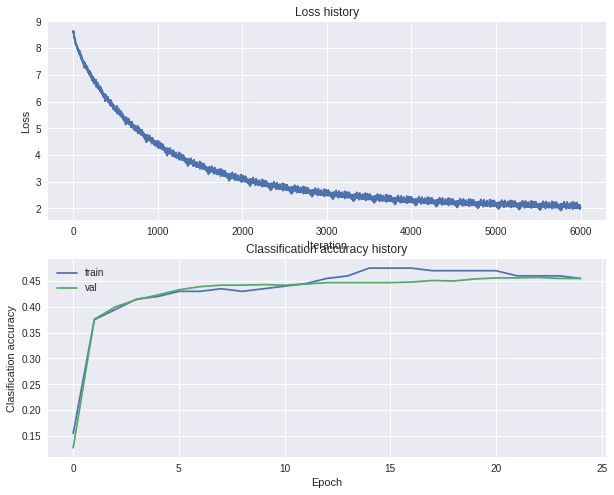

In [7]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

# Hyperparameter tuning

Once you have successfully trained a network you can tune your hyparameters to increase your accuracy.

Based on the graphs of the loss function above you should be able to develop some intuition about what hyperparameter adjustments may be necessary. A very noisy loss implies that the learning rate might be too high, while a linearly decreasing loss would suggest that the learning rate may be too low. A large gap between training and validation accuracy would suggest overfitting due to large model without much regularization. No gap between training and validation accuracy would indicate low model capacity. 


You will compare networks of two and three layers using the different activation functions you implemented. 

The different hyperparameters you can experiment with are:
- **Batch size**: We recommend you leave this at 200 initially which is the batch size we used. 
- **Number of iterations**: You can gain an intuition for how many iterations to run by checking when the validation accuracy plateaus in your train/val accuracy graph.
- **Initialization** Weight initialization is very important for neural networks. We used the initialization `W = np.random.randn(n) / sqrt(n)` where `n` is the input dimension for layer corresponding to `W`. We recommend you stick with the given initializations, but you may explore modifying these. Typical initialization practices: http://cs231n.github.io/neural-networks-2/#init
- **Learning rate**: Generally from around 1e-4 to 1e-1 is a good range to explore according to our implementation.
- **Learning rate decay**: We recommend a 0.95 decay to start.
- **Hidden layer size**: You should explore up to around 120 units per layer. For three-layer network, we fixed the two hidden layers to be the same size when obtaining the target numbers. However, you may experiment with having different size hidden layers.
- **Regularization coefficient**: We recommend trying values in the range 0 to 0.1. 



Hints:
- After getting a sense of the parameters by trying a few values yourself, you will likely want to write a few for loops to traverse over a set of hyperparameters.
- If you find that your train loss is decreasing, but your train and val accuracy start to decrease rather than increase, your model likely started minimizing the regularization term. To prevent this you will need to decrease the regularization coefficient. 


## Two-layer Relu Activation Network 

iteration 0 / 6000: loss 2.549643
iteration 100 / 6000: loss 1.711890
iteration 200 / 6000: loss 1.552029
iteration 300 / 6000: loss 1.655969
iteration 400 / 6000: loss 1.524730
iteration 500 / 6000: loss 1.475860
iteration 600 / 6000: loss 1.435754
iteration 700 / 6000: loss 1.467770
iteration 800 / 6000: loss 1.597663
iteration 900 / 6000: loss 1.368106
iteration 1000 / 6000: loss 1.548073
iteration 1100 / 6000: loss 1.306682
iteration 1200 / 6000: loss 1.379399
iteration 1300 / 6000: loss 1.421897
iteration 1400 / 6000: loss 1.229473
iteration 1500 / 6000: loss 1.279348
iteration 1600 / 6000: loss 1.121228
iteration 1700 / 6000: loss 1.223697
iteration 1800 / 6000: loss 1.211885
iteration 1900 / 6000: loss 1.221579
iteration 2000 / 6000: loss 1.196658
iteration 2100 / 6000: loss 1.247361
iteration 2200 / 6000: loss 1.316933
iteration 2300 / 6000: loss 1.253595
iteration 2400 / 6000: loss 1.123926
iteration 2500 / 6000: loss 1.141823
iteration 2600 / 6000: loss 1.269110
iteration 270

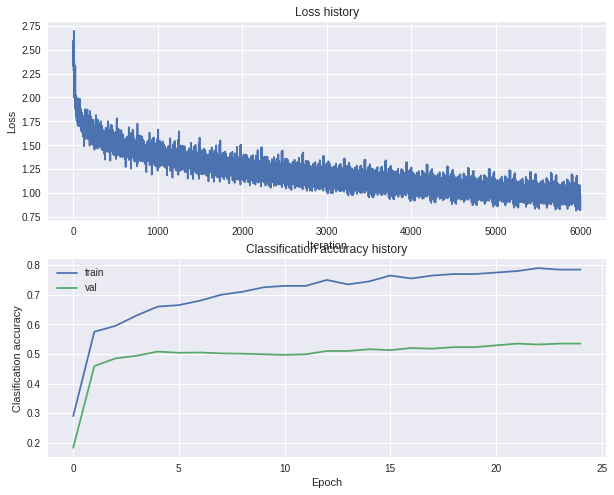

In [8]:
best_2layer_relu = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_2layer_relu.                                                    #
#################################################################################


input_size = 32 * 32 * 3
num_layers = 2
hidden_size = 100
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
best_2layer_relu = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='relu')

# Train the network
stats = best_2layer_relu.train(X_train, y_train, X_val, y_val,
            num_iters=6000, batch_size=200,
            learning_rate=0.1, learning_rate_decay=0.95,
            reg=0.001, verbose=True)

# Predict on the validation set
val_acc = (best_2layer_relu.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

## Two-layer Sigmoid Activation Network 

iteration 0 / 6000: loss 2.485217
iteration 100 / 6000: loss 1.886669
iteration 200 / 6000: loss 1.770255
iteration 300 / 6000: loss 1.825179
iteration 400 / 6000: loss 1.755104
iteration 500 / 6000: loss 1.754354
iteration 600 / 6000: loss 1.729260
iteration 700 / 6000: loss 1.722969
iteration 800 / 6000: loss 1.806475
iteration 900 / 6000: loss 1.660771
iteration 1000 / 6000: loss 1.706508
iteration 1100 / 6000: loss 1.580174
iteration 1200 / 6000: loss 1.692823
iteration 1300 / 6000: loss 1.783303
iteration 1400 / 6000: loss 1.658060
iteration 1500 / 6000: loss 1.554598
iteration 1600 / 6000: loss 1.470168
iteration 1700 / 6000: loss 1.523412
iteration 1800 / 6000: loss 1.682142
iteration 1900 / 6000: loss 1.540981
iteration 2000 / 6000: loss 1.503621
iteration 2100 / 6000: loss 1.716288
iteration 2200 / 6000: loss 1.765474
iteration 2300 / 6000: loss 1.611653
iteration 2400 / 6000: loss 1.614624
iteration 2500 / 6000: loss 1.646002
iteration 2600 / 6000: loss 1.580198
iteration 270

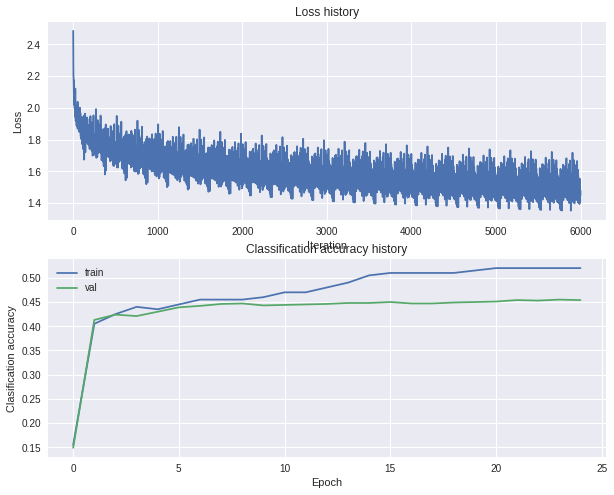

In [5]:
best_2layer_sigmoid = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_2layer_sigmoid.                                                    #
#################################################################################

input_size = 32 * 32 * 3
num_layers = 2
hidden_size = 75
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
best_2layer_sigmoid = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='sigmoid')

# Train the network
stats = best_2layer_sigmoid.train(X_train, y_train, X_val, y_val,
            num_iters=6000, batch_size=200,
            learning_rate=0.1, learning_rate_decay=0.95,
            reg=0.001, verbose=True)

# Predict on the validation set
val_acc = (best_2layer_sigmoid.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

## Three-layer Relu Activation Network 

iteration 0 / 6000: loss 2.475691
iteration 100 / 6000: loss 1.764272
iteration 200 / 6000: loss 1.654223
iteration 300 / 6000: loss 1.696301
iteration 400 / 6000: loss 1.555327
iteration 500 / 6000: loss 1.499311
iteration 600 / 6000: loss 1.432283
iteration 700 / 6000: loss 1.524094
iteration 800 / 6000: loss 1.568074
iteration 900 / 6000: loss 1.420128
iteration 1000 / 6000: loss 1.564693
iteration 1100 / 6000: loss 1.307564
iteration 1200 / 6000: loss 1.386859
iteration 1300 / 6000: loss 1.405273
iteration 1400 / 6000: loss 1.204928
iteration 1500 / 6000: loss 1.279257
iteration 1600 / 6000: loss 1.141498
iteration 1700 / 6000: loss 1.209147
iteration 1800 / 6000: loss 1.248685
iteration 1900 / 6000: loss 1.283459
iteration 2000 / 6000: loss 1.153768
iteration 2100 / 6000: loss 1.202659
iteration 2200 / 6000: loss 1.316008
iteration 2300 / 6000: loss 1.236621
iteration 2400 / 6000: loss 1.171352
iteration 2500 / 6000: loss 1.072927
iteration 2600 / 6000: loss 1.159680
iteration 270

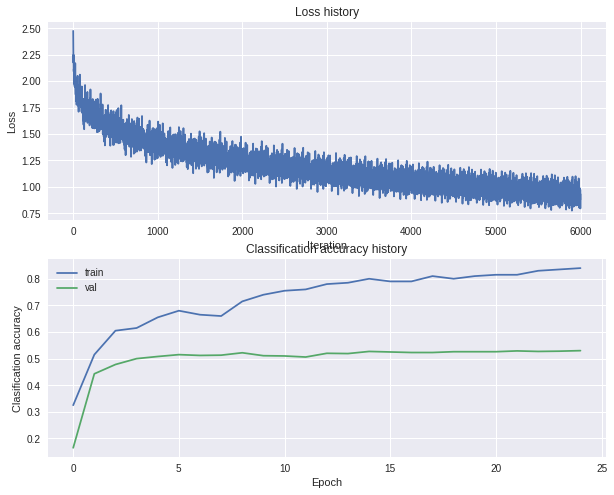

In [16]:
best_3layer_relu = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_3layer_relu.                                                    #
#################################################################################

input_size = 32 * 32 * 3
num_layers = 3
hidden_size = 100
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
best_3layer_relu = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='relu')

# Train the network
stats = best_3layer_relu.train(X_train, y_train, X_val, y_val,
            num_iters=6000, batch_size=200,
            learning_rate=0.1, learning_rate_decay=0.95,
            reg=0.001, verbose=True)

# Predict on the validation set
val_acc = (best_3layer_relu.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

## Three-layer Sigmoid Activation Network 

iteration 0 / 6000: loss 2.531084
iteration 100 / 6000: loss 2.195611
iteration 200 / 6000: loss 2.055366
iteration 300 / 6000: loss 2.043408
iteration 400 / 6000: loss 2.008482
iteration 500 / 6000: loss 1.958543
iteration 600 / 6000: loss 1.901821
iteration 700 / 6000: loss 1.963669
iteration 800 / 6000: loss 1.965079
iteration 900 / 6000: loss 1.863145
iteration 1000 / 6000: loss 1.850691
iteration 1100 / 6000: loss 1.762979
iteration 1200 / 6000: loss 1.863939
iteration 1300 / 6000: loss 1.954997
iteration 1400 / 6000: loss 1.838234
iteration 1500 / 6000: loss 1.716060
iteration 1600 / 6000: loss 1.636654
iteration 1700 / 6000: loss 1.712133
iteration 1800 / 6000: loss 1.853666
iteration 1900 / 6000: loss 1.728602
iteration 2000 / 6000: loss 1.682664
iteration 2100 / 6000: loss 1.885598
iteration 2200 / 6000: loss 1.916390
iteration 2300 / 6000: loss 1.753766
iteration 2400 / 6000: loss 1.764626
iteration 2500 / 6000: loss 1.852087
iteration 2600 / 6000: loss 1.717984
iteration 270

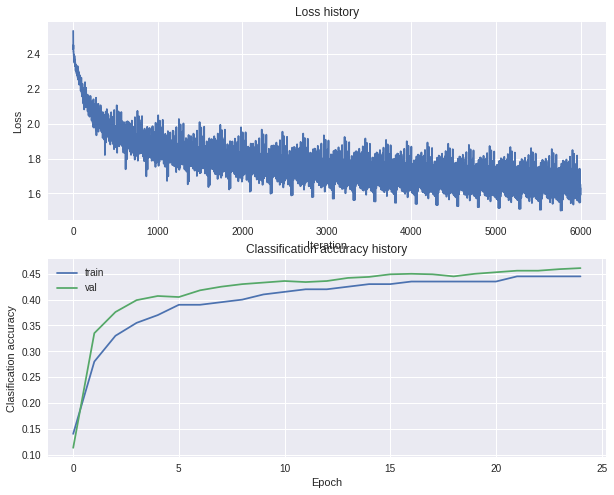

In [19]:
best_3layer_sigmoid = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_3layer_sigmoid.                                                 #
#################################################################################


input_size = 32 * 32 * 3
num_layers = 3
hidden_size = 110
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
best_3layer_sigmoid = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='sigmoid')

# Train the network
stats = best_3layer_sigmoid.train(X_train, y_train, X_val, y_val,
            num_iters=6000, batch_size=200,
            learning_rate=0.1, learning_rate_decay=0.95,
            reg=0.001, verbose=True)

# Predict on the validation set
val_acc = (best_3layer_sigmoid.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

# Run on the test set
When you are done experimenting, you should evaluate your final trained networks on the test set.

In [9]:
print('Two-layer relu')
test_acc = (best_2layer_relu.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Two-layer relu
Test accuracy:  0.524


In [6]:
print('Two-layer sigmoid')
test_acc = (best_2layer_sigmoid.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Two-layer sigmoid
Test accuracy:  0.4686


In [17]:
print('Three-layer relu')
test_acc = (best_3layer_relu.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Three-layer relu
Test accuracy:  0.531


In [20]:
print('Three-layer sigmoid')
test_acc = (best_3layer_sigmoid.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Three-layer sigmoid
Test accuracy:  0.456


# Kaggle output

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 2 Neural Network. Use the following code to do so:

In [0]:
output_submission_csv('nn_2layer_relu_submission.csv', best_2layer_relu.predict(X_test))

In [0]:
output_submission_csv('nn_2layer_sigmoid_submission.csv', best_2layer_sigmoid.predict(X_test))

In [0]:
output_submission_csv('nn_3layer_relu_submission.csv', best_3layer_relu.predict(X_test))

In [0]:
output_submission_csv('nn_3layer_sigmoid_submission.csv', best_3layer_sigmoid.predict(X_test))